# Mount gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Raw file processing for datasets

In [ ]:
# file type conversion from .txt to .xlsx

import os
import pandas as pd

f_list = ['Apple/1','Apple/2', 'Banana/1','Banana/2','Cabbage/1','Cabbage/2','Carrot/1','Carrot/2','Cucumber/1','Cucumber/2','Eggplant/1','Eggplant/2',
          'Garlic/1', 'Garlic/2','Momordica charantia/1','Momordica charantia/2','Onion/1','Onion/2','Strawberry/1','Strawberry/2']


#path = '/content/gdrive/MyDrive/GSTENG/GSTENG_datasets/Apple/1/1.txt'
#path_n = '/content/gdrive/MyDrive/GSTENG/GSTENG_Datasets/Apple/1/1.xlsx'

# txt to xlsx format conversion
for i in f_list:
    path = '/content/gdrive/MyDrive/GSTENG/GSTENG_datasets/' + i + '/'
    path_n1 = '/content/gdrive/MyDrive/GSTENG/GSTENG_Datasets/' + i + '/'
    file_list = os.listdir(path)
    file_list_py = [file for file in file_list if file.endswith('txt')]
    #print(file_list_py)
    #print(path)
    print(path_n1)
    for j in file_list_py:
        path_n2 = path_n1 + j
        path_n2 = path_n2.replace('.txt','.xlsx')
        print(path_n2)
        df = pd.read_csv(path + j,sep="\t",encoding='utf-8')
        #print(df)
        df.to_excel(path_n2,header=False,float_format="%.3f", index=False)

In [ ]:
#remove unnessary row

import os
import pandas as pd

f_list = ['Apple/1','Apple/2', 'Banana/1','Banana/2','Cabbage/1','Cabbage/2','Carrot/1','Carrot/2','Cucumber/1','Cucumber/2','Eggplant/1','Eggplant/2',
          'Garlic/1', 'Garlic/2','Momordica charantia/1','Momordica charantia/2','Onion/1','Onion/2','Strawberry/1','Strawberry/2']

for i in f_list:
    path = '/content/gdrive/MyDrive/GSTENG/GSTENG_Datasets/' + i + '/'
    file_list = os.listdir(path)
    file_list_py = [file for file in file_list if file.endswith('xlsx')]
    print(path)
    for j in file_list_py:
        path_n = path + j
        print(path_n)
        df = pd.read_excel(path_n)
        df = df.drop(df.columns[[0]],axis=1) # 시간 축 제거
        df.to_excel(path_n,header=False,float_format="%.3f",index=False)

In [ ]:
# Concatenation of multi-channel signals data from osc1&2
import os
import pandas as pd

f_list = ['Apple','Banana','Cabbage','Carrot','Cucumber','Eggplant',
          'Garlic','Momordica charantia','Onion','Strawberry']
f_list_num = ['1','2']

for i in f_list:
    path = '/content/gdrive/MyDrive/GSTENG/GSTENG_Datasets/' + i + '/'
    path_1 = path + f_list_num[0] + '/'
    path_2 = path + f_list_num[1] + '/'
    print(path_1)
    print(path_2)
    file_list_1 = os.listdir(path_1)
    file_list_py_1 = [file for file in file_list_1 if file.endswith('xlsx')]
    file_list_2 = os.listdir(path_2)
    file_list_py_2 = [file for file in file_list_2 if file.endswith('xlsx')]
    for j in file_list_py_1:
        path_11 = path_1 + j
        path_22 = path_2 + j
        print(path_1)
        print(path_2)
        df1 = pd.read_excel(path_11)
        df2 = pd.read_excel(path_22)
        df3 = pd.concat([df1,df2],axis=1)
        path_3 = path + j
        print(path_3)
        df3.to_excel(path_3,header=False,float_format="%.3f",index=False)

# # 원하는 엑셀 파일을 pd.read_excel('') 함수를 이용해 데이터프레임으로 만들어준다.
# df1 = pd.read_excel('/content/gdrive/MyDrive/GSTENG/GSTENG_Datasets/Apple/1/1.xlsx')
# df2 = pd.read_excel('/content/gdrive/MyDrive/GSTENG/GSTENG_Datasets/Apple/2/1.xlsx')

# # merge 함수를 이용해 합쳐준다. left는 df1 기준으로 df2가 붙는다는 뜻.
# df3 = pd.concat([df1,df2],axis=1)

# # 해당 데이터프레임을 엑셀로 저장해준다.
# df3.to_excel('/content/gdrive/MyDrive/GSTENG/GSTENG_Datasets/Apple/1.xlsx', index=False)

# Pre-processing

In [ ]:
####################### raw data ################################
import torch
import torch.nn.functional as F
import os
import pandas as pd

# 파일 불러오기

f_list = ['Apple','Banana','Cabbage','Carrot','Cucumber','Eggplant',
          'Garlic','Momordica charantia','Onion','Strawberry']

df1 = pd.DataFrame() # x_trainset rawdata
df2 = pd.DataFrame() # x_testset rawdata
df3 = [] # y_trainset rawdata
df4 = [] # y_testset rawdata

for i in f_list:
    path = '/content/gdrive/MyDrive/GSTENG/GSTENG_Datasets/' + i + '/'
    file_list = os.listdir(path)
    file_list_py = [file for file in file_list if file.endswith('xlsx')]

    if i == 'cucumber'or'garlic'or'onion'or'strawberry':
        for j in file_list_py:
            if int(j[0:-5]) <= 84: #84
                d1 = pd.read_excel(path + j, header=None, index_col=None)
                d1 = pd.DataFrame(data=d1).transpose()
                df1 = pd.concat([df1,d1])
                df3.append(f_list.index(i))
            else:
                d2 = pd.read_excel(path + j, header=None, index_col=None)
                d2 = pd.DataFrame(data=d2).transpose()
                df2 = pd.concat([df2,d2])
                df4.append(f_list.index(i))
    else:
        for j in file_list_py:
            if int(j[0:-5]) <= 85: #85
                d1 = pd.read_excel(path + j, header=None, index_col=None)
                d1 = pd.DataFrame(data=d1).transpose()
                df1 = pd.concat([df1,d1])
                df3.append(f_list.index(i))
            else:
                d2 = pd.read_excel(path + j, header=None, index_col=None)
                d2 = pd.DataFrame(data=d2).transpose()
                df2 = pd.concat([df2,d2])
                df4.append(f_list.index(i))

    df1 = df1.reset_index(drop = True)
    df1 = df1.iloc[:,0:9997]
    df2 = df2.reset_index(drop = True)
    df2 = df2.iloc[:,0:9997]

# tensor 로 변환

df1_np = pd.DataFrame.to_numpy(df1)
df1_np = df1_np.astype('float64')
df2_np = pd.DataFrame.to_numpy(df2)
df2_np = df2_np.astype('float64')
x_train = torch.FloatTensor(df1_np).to('cuda')
x_test = torch.FloatTensor(df2_np).to('cuda')
y_train = torch.LongTensor(df3).to('cuda')
y_test = torch.LongTensor(df4).to('cuda')

print(x_train.size())
print(x_test.size())
print(y_train.size())
print(y_test.size())

# 차원 확장

x_train = x_train.unsqueeze(0).to('cuda')
x_train = x_train.reshape(840,6,9997) #840x6 = 5040
x_test = x_test.unsqueeze(0).to('cuda')
x_test = x_test.reshape(366,6,9997).to('cuda') #366x6 = 2196
print(x_train)

torch.Size([5040, 9997])
torch.Size([2196, 9997])
torch.Size([840])
torch.Size([366])
tensor([[[-0.0400,  0.0000, -0.0400,  ..., -0.0800, -0.0400, -0.0400],
         [ 0.0200, -0.0200,  0.0200,  ...,  0.0200,  0.0200,  0.0200],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0400,  0.0400,  0.0000],
         [-0.0740, -0.0600, -0.0520,  ..., -0.0550, -0.0530, -0.0510],
         [-0.0330, -0.0260, -0.0260,  ..., -0.0310, -0.0320, -0.0300],
         [-0.0250, -0.0170, -0.0160,  ..., -0.0180, -0.0180, -0.0160]],

        [[-0.1200, -0.0800, -0.0800,  ..., -0.0800, -0.0400, -0.0400],
         [-0.0200, -0.0600, -0.0600,  ..., -0.0600, -0.0600, -0.0600],
         [-0.0400,  0.0800,  0.0000,  ...,  0.0000, -0.0400, -0.0400],
         [-0.0850, -0.0660, -0.0520,  ..., -0.0980, -0.1250, -0.1170],
         [-0.0540, -0.0440, -0.0350,  ..., -0.0620, -0.0750, -0.0700],
         [-0.0300, -0.0230, -0.0160,  ..., -0.0430, -0.0580, -0.0530]],

        [[-0.0400, -0.0400,  0.0000,  ..., -0.0400, -0.040

In [ ]:
import torch
import torch.nn.functional as F
import os
import pandas as pd
import numpy as np
from torch.utils.data import Dataset
from torch.utils.data import DataLoader


# Custom_Dataset 만들기

class CustomDataset_train(Dataset):
    # 데이터셋의 전처리를 해주는 부분
    def __init__(self): # x -> 내가 필요한것들
        self.x_data = x_train
        self.y_data = y_train

    # 데이터셋의 길이. 즉, 샘플의 수를 적어주는 부분
    def __len__(self):
        return len(self.x_data)

    # 데이터 셋에서 특정 1개의 샘플을 가져오는 함수
    def __getitem__(self, idx):
        x = self.x_data[idx]
        y = self.y_data[idx]
        return x, y

class CustomDataset_test(Dataset):
    # 데이터셋의 전처리를 해주는 부분
    def __init__(self): # x -> 내가 필요한것들
        self.x_data = x_test
        self.y_data = y_test

    # 데이터셋의 길이. 즉, 샘플의 수를 적어주는 부분
    def __len__(self):
        return len(self.x_data)

    # 데이터 셋에서 특정 1개의 샘플을 가져오는 함수
    def __getitem__(self, idx):
        x = self.x_data[idx]
        y = self.y_data[idx]
        return x, y

train_dataset = CustomDataset_train()
test_dataset = CustomDataset_test()
train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [ ]:
################### 1d cnn model #######################################
import torch
import torch.nn as nn
import torch.nn.functional as F
#import customdataset as cd
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("다음 기기로 학습합니다:", device)

# 랜덤 시드 고정 (for reproducibility)
torch.manual_seed(777)

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

learning_rate = 0.002
training_epochs = 99

class CNN1d(nn.Module):

    def __init__(self):
        super(CNN1d, self).__init__()
        # 첫번째층 (CNN)
        self.layer1 = nn.Sequential(
            nn.Conv1d(6, 16, 3),
            nn.BatchNorm1d(16),
            nn.Tanh())

        # 두번째층 (CNN)
        self.layer2 = nn.Sequential(
            nn.Conv1d(16, 32, 3),
            nn.BatchNorm1d(32),
            nn.Tanh())

        # 세번째층 (CNN)
        self.layer3 = nn.Sequential(
            nn.Conv1d(32, 64, 3),
            nn.BatchNorm1d(64),
            nn.Tanh())

        # 네번째층 (GAP)
        self.layer4 = nn.Sequential(
            nn.AdaptiveAvgPool1d(1),
            nn.Tanh())

        # 다섯번째층 (FC)
        self.layer5 = nn.Sequential(
            nn.Linear(64, 10, bias=True),
            nn.Tanh())

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = out.view(out.shape[0], -1)
        out = self.layer5(out)
        return out

# CNN 모델 정의
model = CNN1d().to(device)

다음 기기로 학습합니다: cuda


In [ ]:
################################ Train & Test (loss & accuracy) #######################################
# Define cost function and optimizer
criterion = nn.CrossEntropyLoss().to(device) # softmax function is included in the cost function
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

total_batch_train = len(train_dataloader)
total_batch_test = len(test_dataloader)

print('train_num of total batch : {}'.format(total_batch_train))
print('test_num of total batch : {}'.format(total_batch_test))

for epoch in range(training_epochs + 1):

    # loss for trainsets
    avg_cost_train = 0

    for X_train, Y_train in train_dataloader:
        X_train = X_train.to(device)
        Y_train = Y_train.to(device)

        optimizer.zero_grad()
        hypothesis = model(X_train)
        cost = criterion(hypothesis, Y_train)
        cost.backward()
        optimizer.step()

        avg_cost_train += cost / total_batch_train

    # loss for testsets
    avg_cost_test = 0

    for X_test, Y_test in test_dataloader:
        X_test = X_test.to(device)
        Y_test = Y_test.to(device)

        optimizer.zero_grad()
        hypothesis = model(X_test)
        cost = criterion(hypothesis, Y_test)
        cost.backward()
        optimizer.step()

        avg_cost_test += cost / total_batch_test

    # accuracy for trainsets
    correct_train = 0
    total_train = 0

    with torch.no_grad():
        for data in train_dataloader:
            voltage_train, labels_train = data
            outputs = model(voltage_train)
            _, predicted_train = torch.max(outputs.data, 1)
            total_train += labels_train.size(0)
            correct_train += (predicted_train == labels_train).sum().item()

    # accuracy for testsets
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for data in test_dataloader:
            voltage_test, labels_test = data
            outputs = model(voltage_test)
            _, predicted_test = torch.max(outputs.data, 1)
            total_test += labels_test.size(0)
            correct_test += (predicted_test == labels_test).sum().item()

    print('[Epoch: {:>4}] Train_loss = {:>.9}'.format(epoch + 1, avg_cost_train) +
          ' Test_loss = {:>.9}'.format(avg_cost_test) +
          ' Train_acc: %f %%' % (100 * correct_train / total_train) +
          ' Test_acc: %f %%' % (100 * correct_test / total_test))

PATH = F"/content/gdrive/My Drive/GSTENG/GSTENG_Datasets/v-net_ks=3_lr=0.002_epoch=100_tanh.pth"
torch.save(model.state_dict(), PATH)

train_num of total batch : 840
test_num of total batch : 366
[Epoch:    1] Train_loss = 1.78787351 Test_loss = 1.53329849 Train_acc: 19.404762 % Test_acc: 19.398907 %
[Epoch:    2] Train_loss = 1.49310029 Test_loss = 1.29568577 Train_acc: 21.071429 % Test_acc: 21.584699 %
[Epoch:    3] Train_loss = 1.37244344 Test_loss = 1.19035256 Train_acc: 38.452381 % Test_acc: 42.349727 %
[Epoch:    4] Train_loss = 1.28809679 Test_loss = 1.12948143 Train_acc: 46.428571 % Test_acc: 48.633880 %
[Epoch:    5] Train_loss = 1.23103297 Test_loss = 1.07429886 Train_acc: 30.476190 % Test_acc: 37.978142 %
[Epoch:    6] Train_loss = 1.17159486 Test_loss = 1.0733006 Train_acc: 46.547619 % Test_acc: 52.732240 %
[Epoch:    7] Train_loss = 1.13553429 Test_loss = 1.03614962 Train_acc: 52.380952 % Test_acc: 54.371585 %
[Epoch:    8] Train_loss = 1.11121023 Test_loss = 1.01487088 Train_acc: 57.500000 % Test_acc: 59.016393 %
[Epoch:    9] Train_loss = 1.07794428 Test_loss = 0.980270147 Train_acc: 50.000000 % Test_ac

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 

<ipython-input-10-569d21ce88c8>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['','Apple','Banana','Cabbage','Carrot','Cucumber','Eggplant','Garlic','Momordica charantia','Onion','Strawberry'])
<ipython-input-10-569d21ce88c8>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['','Apple','Banana','Cabbage','Carrot','Cucumber','Eggplant','Garlic','Momordica charantia','Onion','Strawberry'])


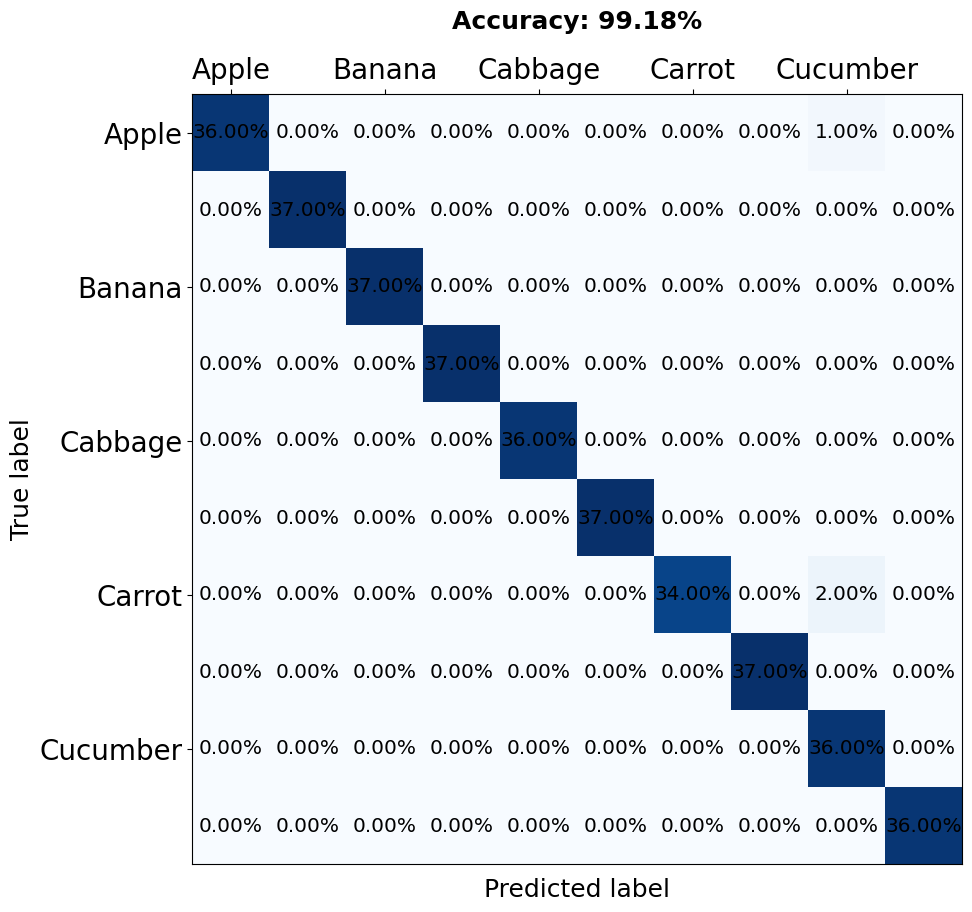

In [ ]:
################################ Confusion matrix #######################################
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import confusion_matrix

labels_arr = []
predicted_arr = []

correct = 0
total = 0

for data in test_dataloader:
    images, labels = data

    outputs = model(images)

    _, predicted = torch.max(outputs.data, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

    labels_arr.append(labels.item())
    predicted_arr.append(predicted.item())

print(labels_arr)
print(predicted_arr)

threshold = 60
conf_matrix = confusion_matrix(y_true=labels_arr, y_pred=predicted_arr)
fig, ax = plt.subplots(figsize=(10, 10))
#ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['','Apple','Banana','Cabbage','Carrot','Cucumber','Eggplant','Garlic','Momordica charantia','Onion','Strawberry'])
#ax.set_yticks([0,1,2,3,4])
ax.set_yticklabels(['','Apple','Banana','Cabbage','Carrot','Cucumber','Eggplant','Garlic','Momordica charantia','Onion','Strawberry'])
#ax.set_title('Confusion Matrix', y=1.0, pad=14)
conf_m = ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha = 1.0)
#plt.colorbar(conf_m, ax = , ticks = [])
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        if conf_matrix[i, j] > threshold:
            ax.text(x=j, y=i,s= "%.2f" % (conf_matrix[i, j]) + "%", va='center', ha='center', size='x-large', color = 'w')
        else:
            ax.text(x=j, y=i,s= "%.2f" % (conf_matrix[i, j]) + "%", va='center', ha='center', size='x-large')

plt.tick_params(axis = "x", which = "both", bottom = False, top = True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Predicted label', fontsize=18, labelpad=10)
plt.ylabel('True label', fontsize=18)
plt.title('Accuracy: %.2f' %(100 * correct / total)+"%", fontsize=18, pad = 20, weight = 'bold')

plt.show()


#Real-Time Classification Testing

##Data pre-processing

In [ ]:
# file type conversion from .txt to .xlsx

import os
import pandas as pd

#path = '/content/gdrive/MyDrive/GSTENG/GSTENG_datasets/Apple/1/1.txt'
#path_n = '/content/gdrive/MyDrive/GSTENG/GSTENG_Datasets/Apple/1/1.xlsx'

# txt to xlsx format conversion
path_1 = '/content/gdrive/MyDrive/GSTENG/GSTENG_datasets/'
path_2 = '/content/gdrive/MyDrive/GSTENG/GSTENG_datasets/'
path_1n = path_1.replace('.txt','.xlsx')
path_2n = path_2.replace('.txt','.xlsx')
print(path_1)
print(path_2)
df1 = pd.read_csv(path_1n,sep="\t",encoding='utf-8')
df2 = pd.read_csv(path_2n,sep="\t",encoding='utf-8')
df1.to_excel(path_n,header=False,float_format="%.3f", index=False)
df2.to_excel(path_n,header=False,float_format="%.3f", index=False)

In [ ]:
#remove unnessary row

import os
import pandas as pd

df1 = pd.read_excel(path_1n)
df2 = pd.read_excel(path_2n)
df1 = df1.drop(df1.columns[[0]],axis=1) # remove time axis
df2 = df2.drop(df2.columns[[0]],axis=1) # remove time axis
df1.to_excel(path_n,header=False,float_format="%.3f",index=False)
df2.to_excel(path_n,header=False,float_format="%.3f",index=False)

In [ ]:
# Concatenation of multi-channel signals data from osc1&2
import os
import pandas as pd

df1 = pd.read_excel(path_1n)
df2 = pd.read_excel(path_2n)
df3 = pd.concat([df1,df2],axis=1)
path_3 = '/content/gdrive/MyDrive/GSTENG/GSTENG_datasets/'
print(path_3)
df3.to_excel(path_3,header=False,float_format="%.3f",index=False)

In [ ]:
path_rtc = '/content/gdrive/MyDrive/GSTENG/GSTENG_Datasets/Apple/4.xlsx'

d1_GSTENG_rtc = pd.read_excel(path_rtc, header=None, index_col=None)
d1_GSTENG_rtc = pd.DataFrame(data=d1_GSTENG_rtc).transpose()
d1_GSTENG_rtc = d1_GSTENG_rtc.reset_index(drop = True)
d1_GSTENG_rtc = d1_GSTENG_rtc.iloc[:,0:9997]
d1_GSTENG_rtc = pd.DataFrame.to_numpy(d1_GSTENG_rtc)
d1_GSTENG_rtc = d1_GSTENG_rtc.astype('float64')

# tensor 로 변환

d1_GSTENG_rtc = torch.FloatTensor(d1_GSTENG_rtc).to('cuda')

# 차원 확장
data_GSTENG = d1_GSTENG_rtc.unsqueeze(0).to('cuda')

In [ ]:
################### 1d cnn model #######################################
import torch
import torch.nn as nn
import torch.nn.functional as F
#import customdataset as cd
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("다음 기기로 학습합니다:", device)

# 랜덤 시드 고정 (for reproducibility)
torch.manual_seed(777)

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

learning_rate = 0.005
training_epochs = 199

class CNN1d(nn.Module):

    def __init__(self):
        super(CNN1d, self).__init__()
        # 첫번째층 (CNN)
        self.layer1 = nn.Sequential(
            nn.Conv1d(6, 16, 3),
            nn.BatchNorm1d(16),
            nn.Tanh())

        # 두번째층 (CNN)
        self.layer2 = nn.Sequential(
            nn.Conv1d(16, 32, 3),
            nn.BatchNorm1d(32),
            nn.Tanh())

        # 세번째층 (CNN)
        self.layer3 = nn.Sequential(
            nn.Conv1d(32, 64, 3),
            nn.BatchNorm1d(64),
            nn.Tanh())

        # 네번째층 (GAP)
        self.layer4 = nn.Sequential(
            nn.AdaptiveAvgPool1d(1),
            nn.Tanh())

        # 다섯번째층 (FC)
        self.layer5 = nn.Sequential(
            nn.Linear(64, 10, bias=True),
            nn.Tanh())

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = out.view(out.shape[0], -1)
        out = self.layer5(out)
        return out

# CNN 모델 정의
model = CNN1d().to(device)

In [ ]:
################################ RTC-Testing #######################################
PATH = F"/content/gdrive/My Drive/GSTENG/GSTENG_Datasets/v-net_ks=3_lr=0.005_epoch=200_tanh.pth"
model.load_state_dict(torch.load(PATH))

f_list = ['Apple','Banana','Cabbage','Carrot','Cucumber','Eggplant',
          'Garlic','Momordica charantia','Onion','Strawberry']

# with torch.no_grad():
#     for data in test_dataloader:
#         images, labels = data
#         outputs = model(images)
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

with torch.no_grad():
    outputs = model(data_GSTENG)
    prob, predicted = torch.max(outputs, 1)
    prob = prob.item()
    predicted = predicted.item()

print(f_list[predicted],' %f %%' % (100 * prob))

Apple  99.999934 %


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

path_expression = "/content/gdrive/MyDrive/Real_Time_Classification/%s.png" % f_list[predicted]
print(path_expression)

img = Image.open(path_expression)

plt.figure(figsize = (5, 5))
plt.xlabel('Speaker : ' + f_list[predicted] + f_list[predicted], fontsize = 20, labelpad = 20)
plt.title('Real Time Classification',fontsize = 30, pad = 20)
plt.text(-80, 650, 'Speaker : (' + f_list[predicted] + ', {:.1f} %) '.format(100 * prob), fontsize = 15)
plt.axis('off')
plt.imshow(img)
plt.show()